In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


df = pd.read_csv("/Users/nicolegallo/Desktop/WGU/D600_inprogress/Task1/d600-statistical-data-mining/d600-housing-task1.csv")
df.head()

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7000 non-null   int64  
 1   Price                 7000 non-null   float64
 2   SquareFootage         7000 non-null   float64
 3   NumBathrooms          7000 non-null   float64
 4   NumBedrooms           7000 non-null   int64  
 5   BackyardSpace         7000 non-null   float64
 6   CrimeRate             7000 non-null   float64
 7   SchoolRating          7000 non-null   float64
 8   AgeOfHome             7000 non-null   float64
 9   DistanceToCityCenter  7000 non-null   float64
 10  EmploymentRate        7000 non-null   float64
 11  PropertyTaxRate       7000 non-null   float64
 12  RenovationQuality     7000 non-null   float64
 13  LocalAmenities        7000 non-null   float64
 14  TransportAccess       7000 non-null   float64
 15  Fireplace            

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,EmploymentRate,PropertyTaxRate,RenovationQuality,LocalAmenities,TransportAccess,Floors,Windows,PreviousSalePrice,IsLuxury
count,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000,7.000000e+03,7000.00000
mean,3500.500000,3.072820e+05,1048.947459,2.131397,3.008571,511.507029,31.226194,6.942923,46.797046,17.475337,93.711349,1.500437,5.003357,5.934579,5.983860,1.16300,16.248857,2.845094e+05,0.50400
std,2020.870275,1.501734e+05,426.010482,0.952561,1.021940,279.926549,18.025327,1.888148,31.779701,12.024985,4.505359,0.498591,1.970428,2.657930,1.953974,0.37209,8.926479,1.857340e+05,0.50002
min,1.000000,8.500000e+04,550.000000,1.000000,1.000000,0.390000,0.030000,0.220000,0.010000,0.000000,72.050000,0.010000,0.010000,0.000000,0.010000,1.00000,-6.000000,-8.356902e+03,0.00000
25%,1750.750000,1.921075e+05,660.815000,1.290539,2.000000,300.995000,17.390000,5.650000,20.755000,7.827500,90.620000,1.160000,3.660000,4.000000,4.680000,1.00000,11.000000,1.420140e+05,0.00000
50%,3500.500000,2.793230e+05,996.320000,1.997774,3.000000,495.965000,30.385000,7.010000,42.620000,15.625000,94.010000,1.490000,5.020000,6.040000,6.000000,1.00000,15.000000,2.621831e+05,1.00000
75%,5250.250000,3.918781e+05,1342.292500,2.763997,4.000000,704.012500,43.670000,8.360000,67.232500,25.222500,97.410000,1.840000,6.350000,8.050000,7.350000,1.00000,20.000000,3.961212e+05,1.00000
max,7000.000000,1.046676e+06,2874.700000,5.807239,7.000000,1631.360000,99.730000,10.000000,178.680000,65.200000,99.900000,3.360000,10.000000,10.000000,10.000000,3.00000,63.000000,1.296607e+06,1.00000


In [3]:
# Select the variables
selected_cols = [
    'Price',
    'SquareFootage',
    'BackyardSpace',
    'NumBedrooms',
    'AgeOfHome',
    'SchoolRating',
    'RenovationQuality'
]

# Get summary statistics
df[selected_cols].describe(include='all')


,Price,SquareFootage,BackyardSpace,NumBedrooms,AgeOfHome,SchoolRating,RenovationQuality
count,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3.072820e+05,1048.947459,511.507029,3.008571,46.797046,6.942923,5.003357
std,1.501734e+05,426.010482,279.926549,1.021940,31.779701,1.888148,1.970428
min,8.500000e+04,550.000000,0.390000,1.000000,0.010000,0.220000,0.010000
25%,1.921075e+05,660.815000,300.995000,2.000000,20.755000,5.650000,3.660000
50%,2.793230e+05,996.320000,495.965000,3.000000,42.620000,7.010000,5.020000
75%,3.918781e+05,1342.292500,704.012500,4.000000,67.232500,8.360000,6.350000
max,1.046676e+06,2874.700000,1631.360000,7.000000,178.680000,10.000000,10.000000


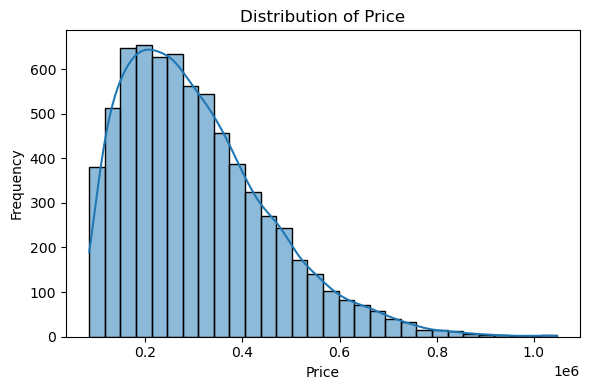

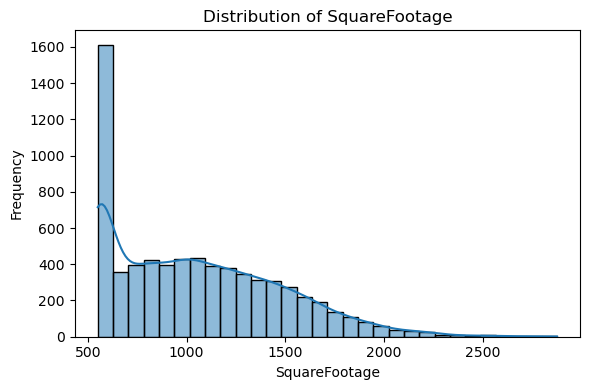

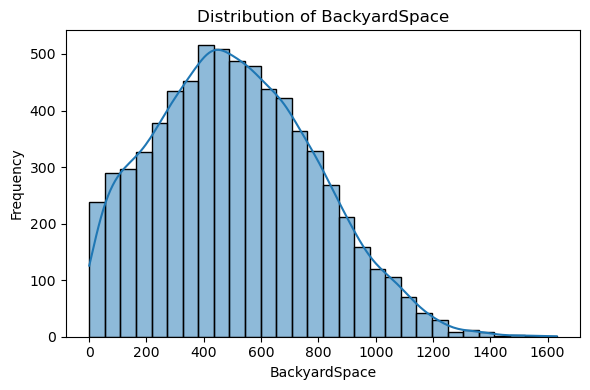

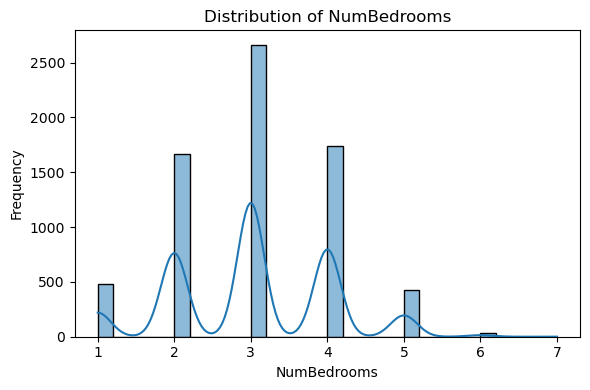

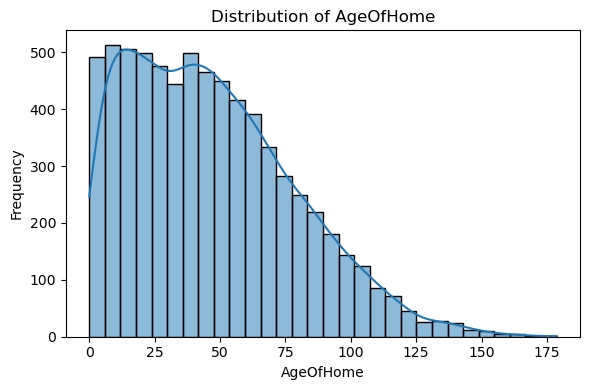

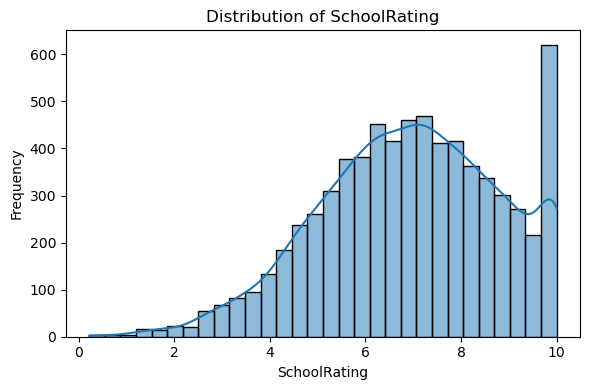

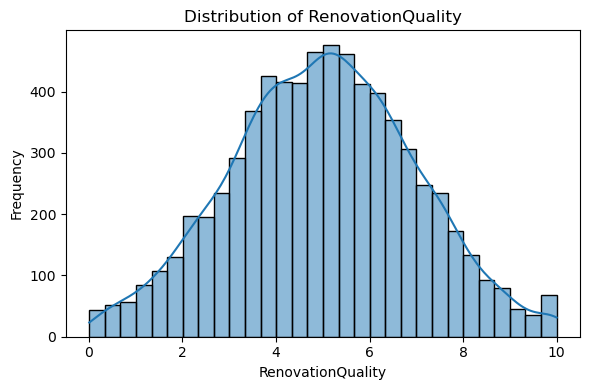

In [4]:
univariate_vars = [
    'Price', 'SquareFootage', 'BackyardSpace', 'NumBedrooms',
    'AgeOfHome', 'SchoolRating', 'RenovationQuality'
]

# Plot histograms for each variable
for var in univariate_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, kde=True, bins=30)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


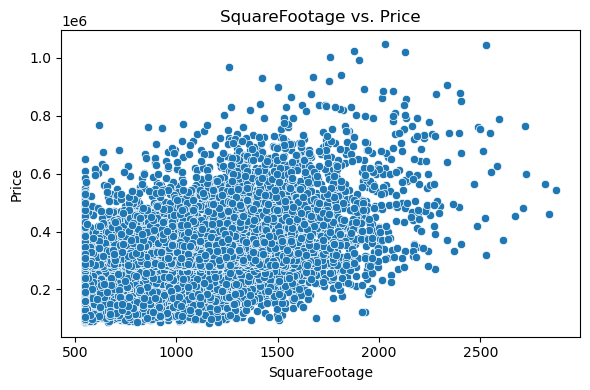

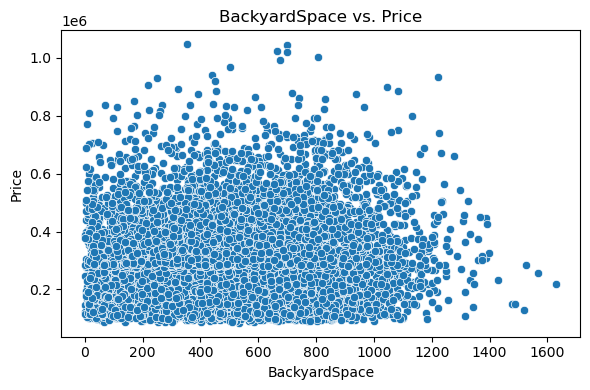

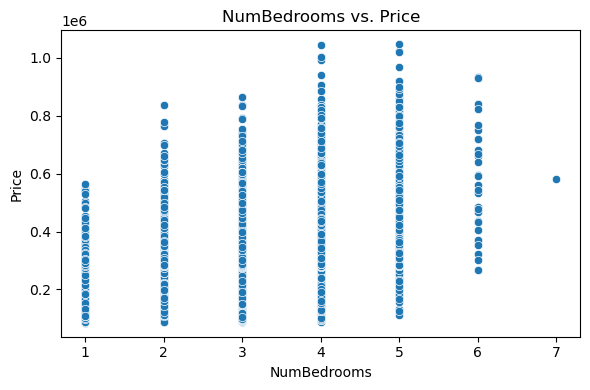

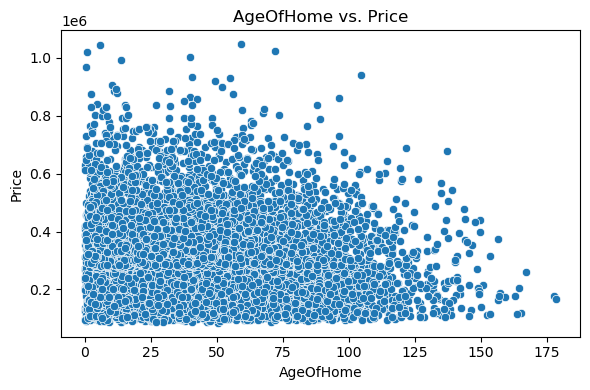

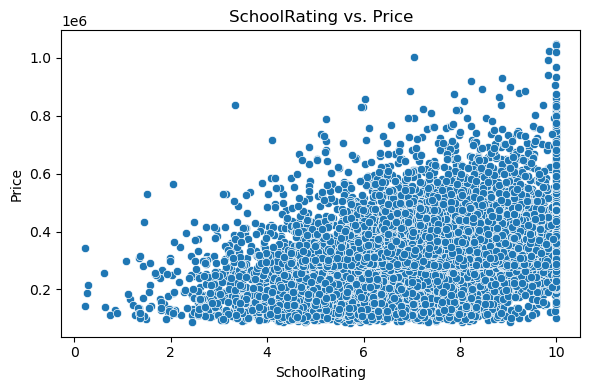

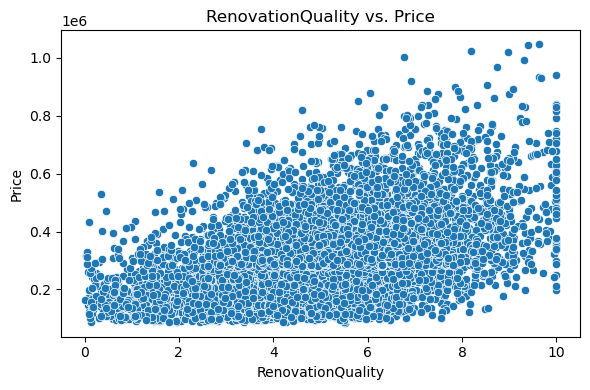

In [5]:
independent_vars = [
    'SquareFootage', 'BackyardSpace', 'NumBedrooms',
    'AgeOfHome', 'SchoolRating', 'RenovationQuality'
]

# Plot each independent variable vs. Price
for var in independent_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=var, y='Price')
    plt.title(f'{var} vs. Price')
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()


In [6]:
# Define your features (X) and target (y)
features = [
    'SquareFootage', 'BackyardSpace', 'NumBedrooms',
    'AgeOfHome', 'SchoolRating', 'RenovationQuality'
]
target = 'Price'

X = df[features]
y = df[target]

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shape
print(f'Training set: {X_train.shape}, Testing set: {X_test.shape}')


Training set: (5600, 6), Testing set: (1400, 6)


In [7]:
# Combine X_training and y_training
training_set = pd.concat([X_train, y_train], axis=1)
testing_set = pd.concat([X_test, y_test], axis=1)

# Export to CSV
training_set.to_csv("training_dataset.csv", index=False)
testing_set.to_csv("testing_dataset.csv", index=False)

# Add constant to X_training for intercept
X_train_sm = sm.add_constant(X_train)

# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(y_train, X_train_sm).fit()

# Show full summary
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     984.1
Date:                Tue, 22 Jul 2025   Prob (F-statistic):               0.00
Time:                        18:42:17   Log-Likelihood:                -72720.
No. Observations:                5600   AIC:                         1.455e+05
Df Residuals:                    5593   BIC:                         1.455e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -8.742e+04   7228.986    -12.093      0.000   -1.02e+05   -7.33e+04
SquareFootage       148.3292      3.648     40.662      0.000     141.178     155.480
BackyardSpace        -2.2685      5.078     -0.447      0.655     -12.223       7.686
NumBedrooms        5.314e+04   1504.657     35.317      0.000    5.02e+04    5.61e+04
AgeOfHome          -201.5456     45.233     -4.456      0.000    -290.220    -112.871
SchoolRating       1409.3323    911.752      1.546      0.122    -378.055    3196.720
RenovationQuality  1.608e+04    879.339     18.284      0.000    1.44e+04    1.78e+04
==============================================================================
Omnibus:                      454.064   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.630
Skew:                           0.712   Prob(JB):                    9.19e-129
Kurtosis:                       3.705   Cond. No.                     6.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# Remove the non-significant variables and refit the model

optimized_features = [
    'SquareFootage', 'NumBedrooms',
    'AgeOfHome', 'RenovationQuality'
]
# Add intercept
X_train_optimized = sm.add_constant(X_train[optimized_features])

# Fit optimized model
model_optimized = sm.OLS(y_train, X_train_optimized).fit()
model_optimized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     1475.
Date:                Tue, 22 Jul 2025   Prob (F-statistic):               0.00
Time:                        18:42:17   Log-Likelihood:                -72721.
No. Observations:                5600   AIC:                         1.455e+05
Df Residuals:                    5595   BIC:                         1.455e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -8.371e+04   6202.352    -13.497      0.000   -9.59e+04   -7.16e+04
SquareFootage       148.8946      3.617     41.168      0.000     141.804     155.985
NumBedrooms        5.381e+04   1438.066     37.418      0.000     5.1e+04    5.66e+04
AgeOfHome          -205.0193     45.135     -4.542      0.000    -293.501    -116.537
RenovationQuality  1.656e+04    814.633     20.334      0.000     1.5e+04    1.82e+04
==============================================================================
Omnibus:                      449.423   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              581.678
Skew:                           0.709   Prob(JB):                    4.90e-127
Kurtosis:                       3.696   Cond. No.                     5.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Add intercept
X_train_optimized = sm.add_constant(X_train[optimized_features])

# Predict training set prices
y_train_pred = model_optimized.predict(X_train_optimized)

# Calculate Mean Squared Error for training set
mse_training = mean_squared_error(y_train, y_train_pred)
print(f"Training Set MSE: {mse_training:.2f}")



Training Set MSE: 11141450809.64


In [10]:
# Add constant to testing data
x_test_optimized = sm.add_constant(X_test[optimized_features])

# Predict testing set prices
y_test_pred = model_optimized.predict(x_test_optimized)

# Calculate Mean Squared Error for testing set
mse_testing = mean_squared_error(y_test, y_test_pred)
print(f"Testing Set MSE: {mse_testing:.2f}")


Testing Set MSE: 11055569447.21
